# Aplicação de redes neurais para de clientes para contratação de empréstimo pessoal

## Contexto do problema

Este caso é sobre um banco (*Thera Bank*) que possui uma base de clientes crescente. A maioria desses clientes são clientes passivos (depositantes) com depósitos de tamanhos variados. O número de clientes que também são devedores (clientes de ativos) é bastante pequeno, e o banco está interessado em expandir essa base rapidamente para trazer mais negócios de crédito e, no processo, ganhar mais com os juros dos empréstimos. Em particular, a administração deseja explorar maneiras de converter seus clientes passivos em clientes de empréstimos pessoais (enquanto os mantém como depositantes). Uma campanha realizada pelo banco para clientes passivos mostrou uma taxa de conversão saudável de mais de 9% de sucesso. Isso encorajou o departamento de *marketing* de varejo a elaborar campanhas para melhor direcionar o *marketing* para aumentar a taxa de sucesso com um orçamento mínimo.

O departamento quer construir um modelo que os ajude a identificar os clientes potenciais com maior probabilidade de adquirir o empréstimo. Isso aumentará a taxa de sucesso e, ao mesmo tempo, reduzirá o custo da campanha.

## Modelo

Nesse problema será usado um modelo de redes neurais artificiais, que são modelos de *Deep Learning* (uma área do *Machine Learning*) que estão se tornando bastante usados, principalmente em grandes conjuntos de dados, onde possuem um desempenho melhor que algoritmos de *machine learning*. Redes neurais são modelos computacionais que foram inspirados no sistema nervoso central de um ser vivo e utiliza-se de várias camadas de neurônios artificiais (camadas de entradas, camadas ocultas e camadas de saídas) e esses neurônios artificais nada mais são estruturas onde valores são *inputados* multiplicados por um conjunto de pesos, aplicados a uma função que chamamos de *Soma* e aplicados a uma função de ativação.

## Dados

Os dados que serão usados nesse projeto podem ser encontrados [aqui](https://www.kaggle.com/itsmesunil/bank-loan-modelling?select=Bank_Personal_Loan_Modelling.xlsx).

Essa base possui as seguintes *features*:

1) *ID*	 - ID do Cliente; 

2) *Age* -	Idade do cliente em anos completos;

3) *Experience* - Anos de experiência profissional;

4) *Income	Annual* -  Renda anual do cliente;

5) *ZIP Code*	- CEP do endereço residencial;

6) *Family*	- Tamanho da família do cliente;

7) *CCAvg*	-  gastos médios com cartões de crédito por mês;

8) *Education* - Nível de escolaridade. 1: sem Graduação; 2: Graduação; 3: Avançado / Profissional;

9) *Mortgage*	- Valor da hipoteca da casa, se houver;

10) *Personal Loan*	- Este cliente aceitou o empréstimo pessoal oferecido na última campanha?

11) *Securities Account*	-  O cliente possui conta de valores mobiliários no banco?

12) *CD Account*	- O cliente possui uma conta de certificado de depósito (CD) no banco?

13) *Online*	- O cliente usa serviços de internet banking? 

14) *CreditCard*	- O cliente usa um cartão de crédito emitido pelo UniversalBank?

## Etapas

1) Importação das bibliotecas;

2) Importação da base de dados;

3) Análise dos dados;

4) Análise exploratória dos dados;

5) Separar dados de treino e teste;

6) Criação da rede neural;

7) Avaliação da rede neural;

8) Testes de outras redes neurais;

9) Comparação dos resultados;

10) Conclusão.

## Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

## Importando os dados

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bank_modelling_marketing.xlsx to Bank_modelling_marketing.xlsx


In [ ]:
bank=pd.read_excel('Bank_modelling_marketing.xlsx')

## Análise dos dados

Visualizando as 10 primeiras linhas da base de dados.

In [ ]:
bank.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


Visualizando as 10 últimas linhas da base de dados.

In [ ]:
bank.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.000000,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.900000,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.500000,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.666667,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.000000,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.900000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.400000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.300000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.500000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.800000,1,0,0,0,0,1,1


Informações sobre a base de dados.

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Não temos valores faltantes.

In [ ]:
bank.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Nossa base de dados possui 5000 linhas e 14 colunas.

In [ ]:
bank.shape

(5000, 14)

Tabela estatística da base de dados.

In [ ]:
bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Análise exploratória dos dados

Na *feature Age*, podemos ver abaixo a distribuição das idades e ver, também, que a idade média de quem aceitou o empréstimo pessoal e quem não aceitou não tem muita diferença.

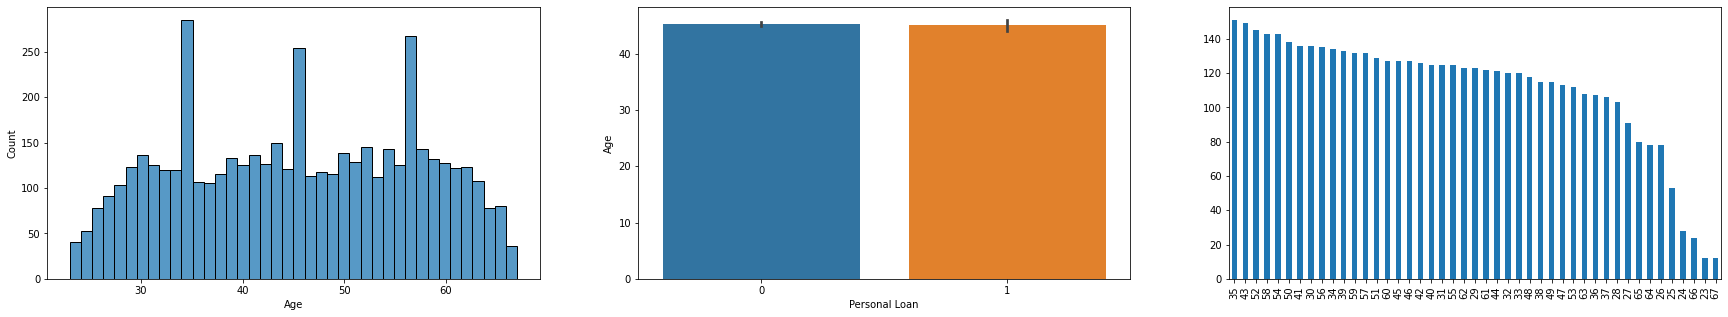

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(30,5))
bank['Age'].value_counts().plot.bar(ax=ax[2])
sns.histplot(bank['Age'],bins=40,ax=ax[0])
sns.barplot(x='Personal Loan',y='Age',data=bank,ax=ax[1]);
#sns.countplot(x='Age',data=bank, ax=ax[2]);

Podemos ver os valores médios das idades de quem aceitou ou não o empréstimo pessoal.

In [ ]:
print('Idade média de quem aceitou o empréstimo pessoal :',round(bank[bank['Personal Loan']==1]['Age'].mean(),3))
print('')
print('Idade média de quem não aceitou o empréstimo pessoal :',round(bank[bank['Personal Loan']==0]['Age'].mean(),3))

Idade média de quem aceitou o empréstimo pessoal : 45.067

Idade média de quem não aceitou o empréstimo pessoal : 45.367


Bem semelhante o comportamento da Experiência profissional em anos, mas com aqueles que aceitaram o empréstimo tem anos de experiência um pouco maior.

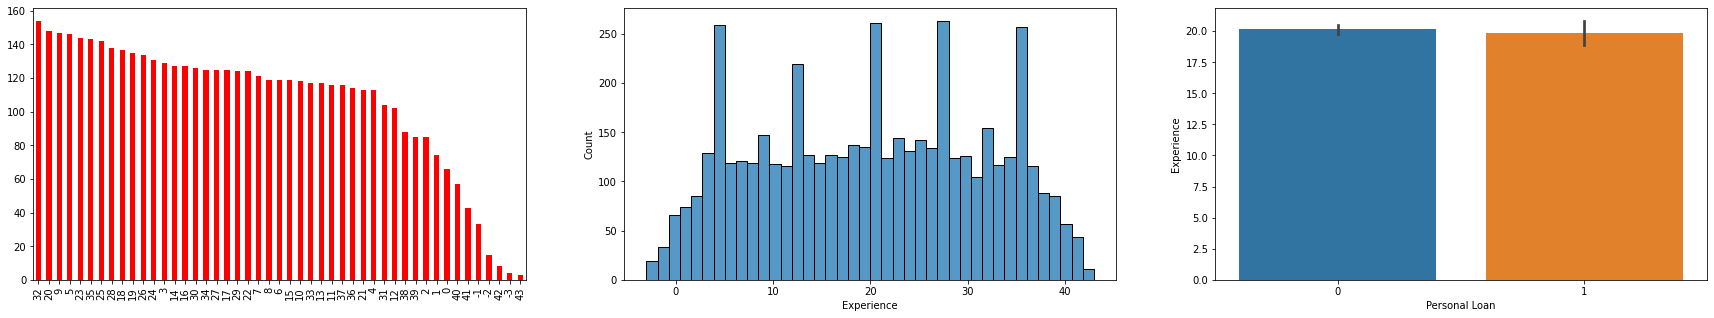

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(30,5))
bank['Experience'].value_counts().plot.bar(ax=ax[0],color='red')
sns.histplot(bank['Experience'],bins=40,ax=ax[1])
sns.barplot(x='Personal Loan',y='Experience',data=bank,ax=ax[2]);
#sns.countplot(x='Age',data=bank, ax=ax[2]);

Aqui vemos que os clientes que aceitou o empréstimo tem um tempo menor de experiência.

In [ ]:
print('Experiência média de quem aceitou o empréstimo pessoal :',
      round(bank[bank['Personal Loan']==1]['Experience'].mean(),3))
print('')
print('Experiência média de quem não aceitou o empréstimo pessoal :',
      round(bank[bank['Personal Loan']==0]['Experience'].mean(),3))

Experiência média de quem aceitou o empréstimo pessoal : 19.844

Experiência média de quem não aceitou o empréstimo pessoal : 20.132


Para a coluna de renda vemos que os dados estão mais distribuídos para valores abaixo de 100. A média da renda de quem contratou o empréstimo é maior do que quem não contratou.

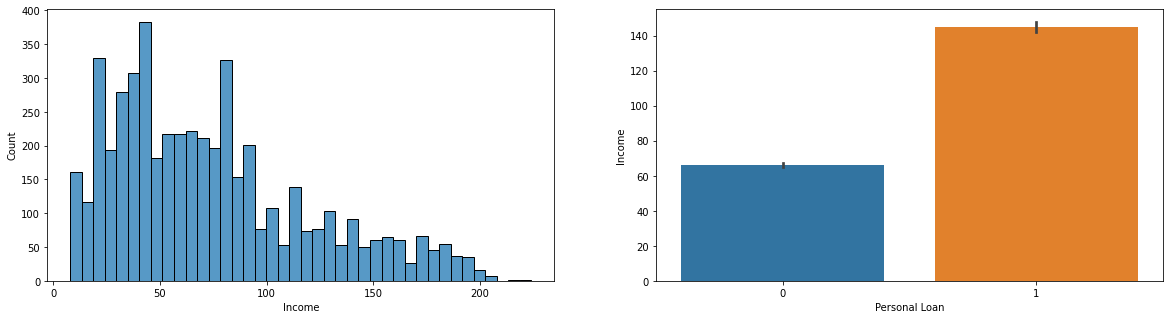

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.histplot(bank['Income'],bins=40,ax=ax[0])
sns.barplot(x='Personal Loan',y='Income',data=bank,ax=ax[1]);

Em *Family* a maioria dos clientes são solteiros, pois só há 1 integrante na família.

In [ ]:
bank['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

Vamos ver o número de contratantes de empréstimos por tamanho da família graficamente.

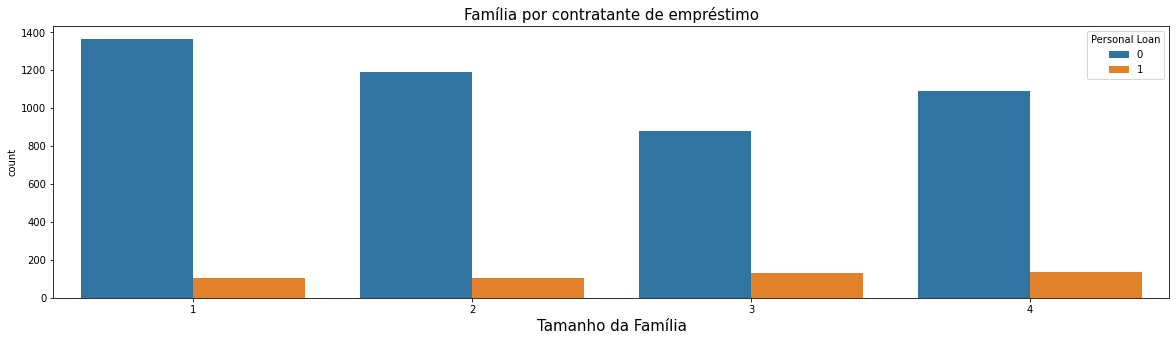

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x='Family',hue='Personal Loan', data=bank)
plt.title('Família por contratante de empréstimo',size=15)
plt.xlabel('Tamanho da Família',size=15);

A famílias com 3 e 4 integrantes foram os que mais contraram o empréstimo.

In [ ]:
bank[bank['Personal Loan']==1]['Family'].value_counts()

4    134
3    133
1    107
2    106
Name: Family, dtype: int64

Olhando o gasto médio de cartão de crédito mensal, observa-se que aqueles que contratam o empréstimo possuem uma média de gastos bem maior. A distribuição dos gastos, em sua maioria, se concentram abaixo de $ 2000.

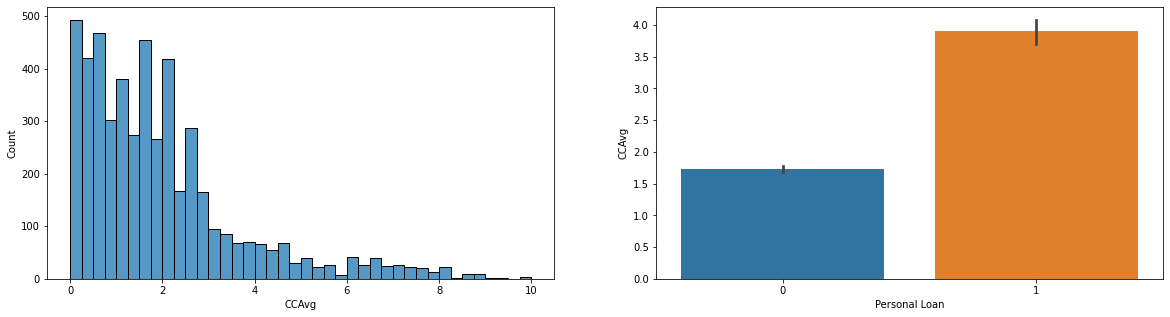

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.histplot(bank['CCAvg'],bins=40,ax=ax[0])
sns.barplot(x='Personal Loan',y='CCAvg',data=bank,ax=ax[1]);

Quem contrata empréstimos tem mais que o dobro do gasto de quem não contrata.

In [ ]:
print('Gasto médio de quem aceitou o empréstimo pessoal :',round(bank[bank['Personal Loan']==1]['CCAvg'].mean(),3))
print('')
print('Gasto médio de quem não aceitou o empréstimo pessoal :',round(bank[bank['Personal Loan']==0]['CCAvg'].mean(),3))

Gasto médio de quem aceitou o empréstimo pessoal : 3.905

Gasto médio de quem não aceitou o empréstimo pessoal : 1.729


A maioria dos clientes não possuem graduação e que os clientes com algum tipo de educação que é mais avançada são os que mais contratam o empréstimo pessoal.

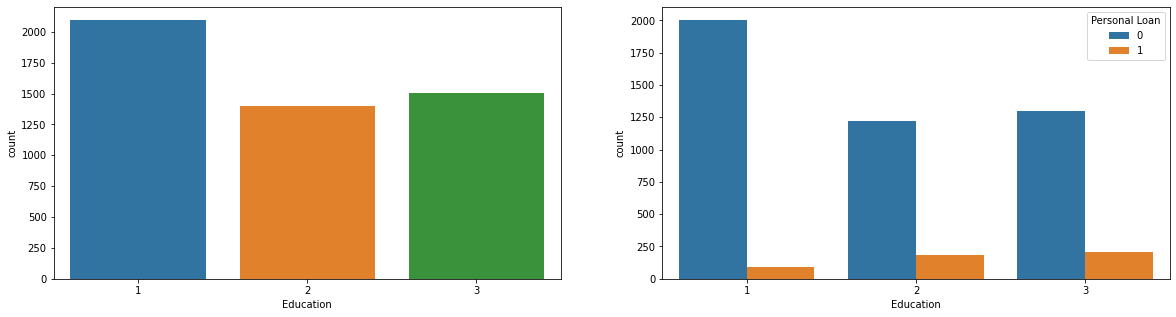

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='Education',data=bank,ax=ax[0])
sns.countplot(x='Education',data=bank,ax=ax[1],hue='Personal Loan');

Os valores das hipotecas das casas dos clientes estão mais distribuídos em valores menores que $ 100.000 (podemos conferir isso observando a média da coluna na tabela estatística gerada anteriormente).

Aqueles clientes que mais solicitaram o empréstimo possuem um valor de hipoteca bem maior do que os demais.

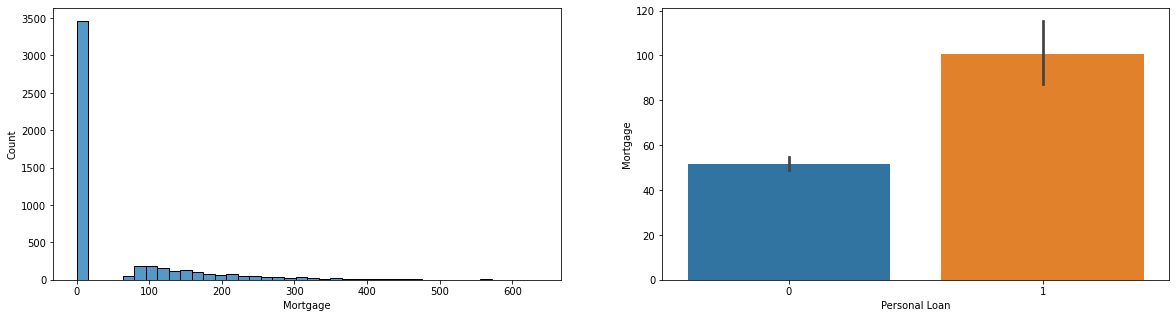

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.histplot(bank['Mortgage'],bins=40,ax=ax[0])
sns.barplot(x='Personal Loan',y='Mortgage',data=bank,ax=ax[1]);

Há mais clientes que não possuem conta de valores mobiliários, porém são que mais contram o empréstimo pessoal.

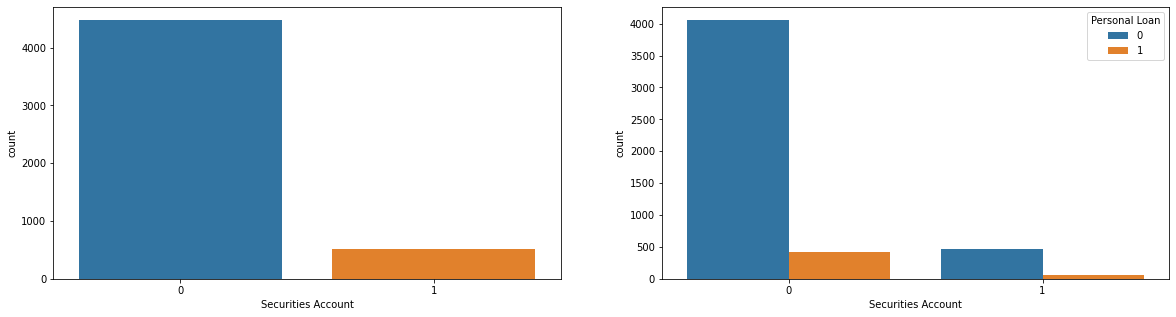

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='Securities Account',data=bank,ax=ax[0])
sns.countplot(x='Securities Account',data=bank,ax=ax[1],hue='Personal Loan');

A mesma coisa se observa com clientes que possuem ou não conta com certificado: A maioria não possui esse tipo de conta, mas são justamente esses que mais contratam empréstimos.

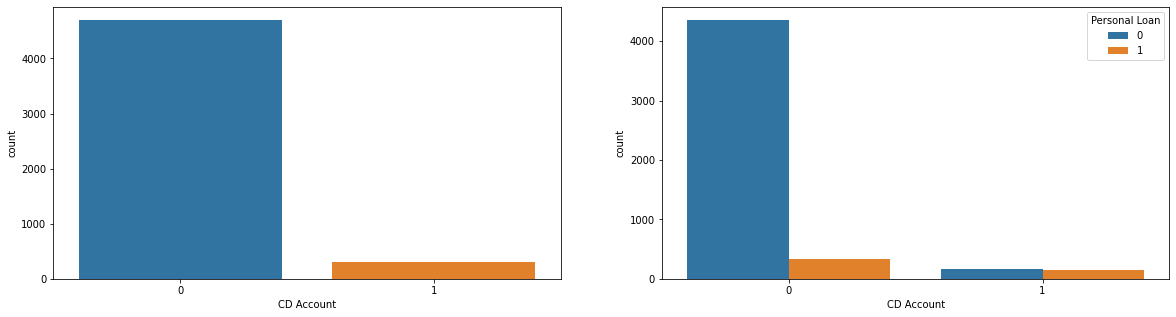

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='CD Account',data=bank,ax=ax[0])
sns.countplot(x='CD Account',data=bank,ax=ax[1],hue='Personal Loan');

A maioria dos clientes usam *internet banking* e são esse grupo que mais contratam empréstimos.

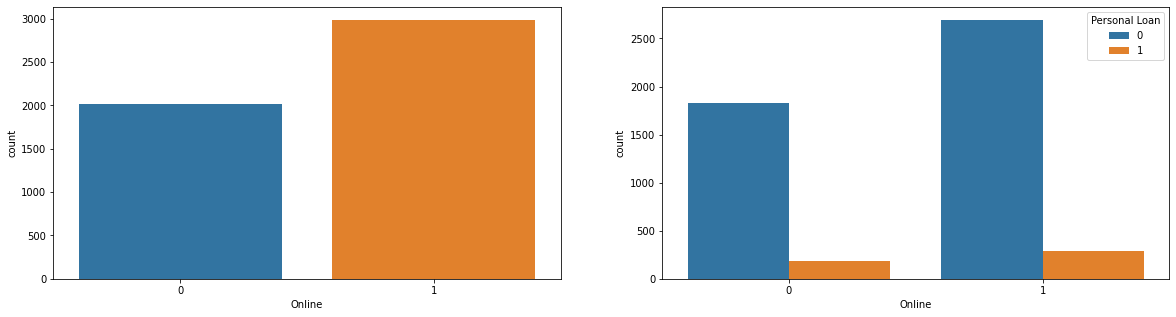

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='Online',data=bank,ax=ax[0])
sns.countplot(x='Online',data=bank,ax=ax[1],hue='Personal Loan');

A maioria dos clientes não utiliza cartão de crédito, mas é esse grupo que contrata o empréstimo.

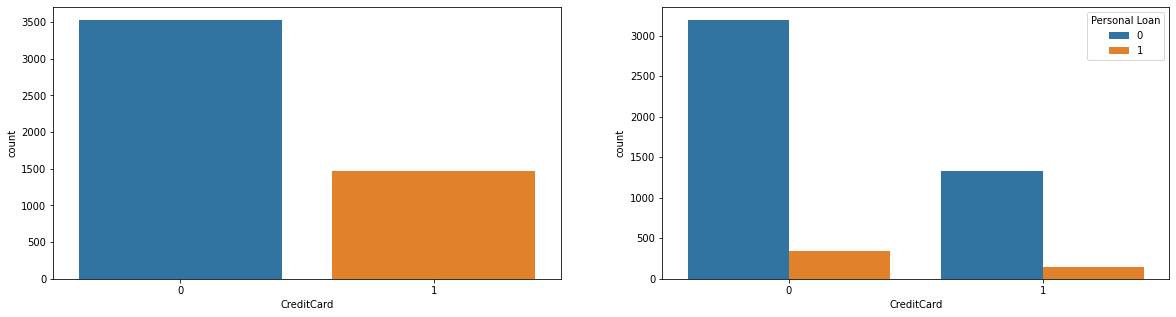

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='CreditCard',data=bank,ax=ax[0])
sns.countplot(x='CreditCard',data=bank,ax=ax[1],hue='Personal Loan');

Por fim nossa variável alvo *Personal Loan*.

A maioria dos clientes não contrata o empréstimo pessoal.

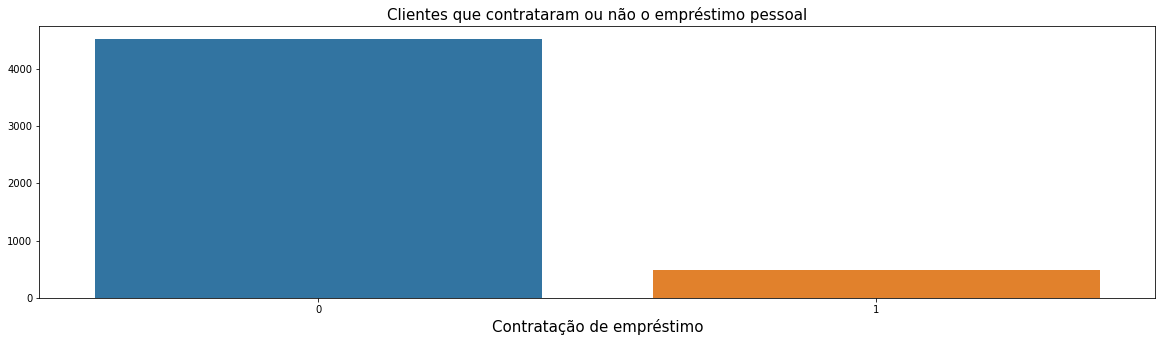

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x='Personal Loan', data=bank)
plt.xlabel('Contratação de empréstimo',size=15)
plt.ylabel('')
plt.title('Clientes que contrataram ou não o empréstimo pessoal',size=15);

## Separando dados de treino e teste

Agora iremos separa uma parte dos dados para treinar a Rede Neural e depois iremos usar uma outra parte para avaliar o modelo com as métricas de avaliação pertinentes. Aqui eu irei excluir a coluna *ID* e *ZIP Code*, pois são colunas que ao meu ver não trazem informações relevantes para o treinamento do modelo.

Definindo as colunas com as *features* e a coluna alvo ou *target*.

In [ ]:
X=bank[['Age', 'Experience', 'Income', 'Family', 'CCAvg','Education', 'Mortgage','Securities Account','CD Account', 'Online',
        'CreditCard']]

y=bank['Personal Loan']

Dimensão dessas bases de dados: temos a base com as *features* com 11 colunas e a base com a variável *target*.

In [ ]:
print(X.shape,y.shape)

(5000, 11) (5000,)


Agora vamos dividir os dados em treino e de teste. Aplicarei uma parte da base com as *features* e uma parte da base com a variável *target* para treinar o modelo; já a outra parte será para avaliar o desempenho do modelo.

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,random_state=42,test_size=0.2)

Dimensões das bases de treino e teste.

In [ ]:
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(4000, 11) (1000, 11) (4000,) (1000,)


Podemos ver, graficamente, que para ambos os *dataset* (treino e teste) as classes se mantém desbalanceadas.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


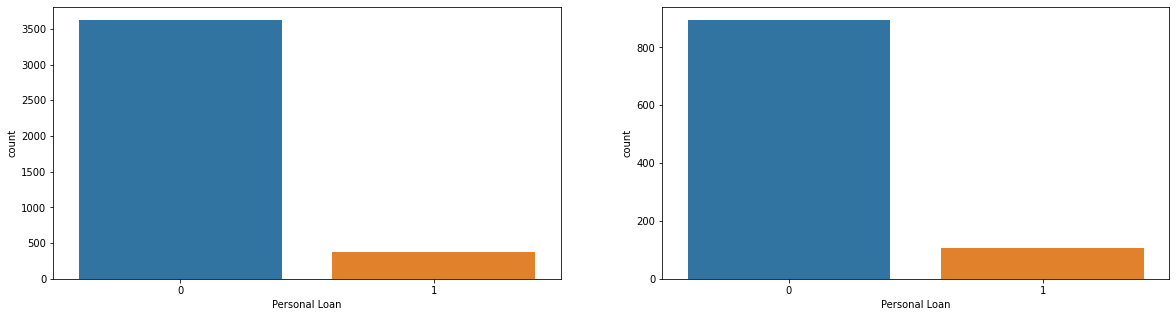

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(y_treino,ax=ax[0])
sns.countplot(y_teste,ax=ax[1]);

Antes iremos fazer uma padronização em algumas colunas da nossas bases de treino e de teste. Iremos padronizar as colunas *Age, Experience, Income, CCAvg* e *Mortgage* que tratam, respectivamente, de idade, anos de experiência, renda, gasto mensal do cartão de crédito e o valor da hipoteca da casa dos clientes que a possuem, pois seus valores são contínuos e não são adequados para modelos de classificação, tanto de *machine learning* como de *deep learning*, que é o nosso caso.

Para isso faremos um *for loop* subtraindo o valor da média de cada observação de cada coluna e dividindo pelo desvio padrão da mesma.

In [ ]:
lista=['Age','Experience','Income','CCAvg','Mortgage']

for i in lista:
  X_treino[i] = (X_treino[i] - X_treino[i].mean())/(X_treino[i].std())
  X_teste[i] = (X_teste[i] - X_teste[i].mean())/(X_teste[i].std())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Abaixo podemos ver a base de treino novamente, mas com os valores das colunas, que citamos anteriormente, padronizadas.

In [ ]:
X_treino

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
4227,-1.157922,-1.136246,0.805772,1,1.068210,1,-0.552282,1,0,0,0
4676,-0.546605,-0.612620,-0.128425,3,0.096521,1,-0.552282,1,0,1,0
800,-1.245253,-1.136246,2.152753,1,2.325690,1,-0.552282,0,0,1,0
3671,0.414036,0.434631,-1.214700,1,-0.875168,3,-0.552282,0,0,1,0
4193,1.462009,1.481883,-0.932268,3,-0.989484,1,-0.552282,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4426,-1.070591,-1.048975,1.435811,1,1.525476,1,-0.552282,0,0,1,0
466,-1.769239,-1.747143,-1.323327,2,-0.589377,3,-0.552282,0,0,1,0
3092,-0.197281,-0.176266,0.849223,2,-0.875168,1,2.586437,1,0,0,0
3772,-0.895929,-0.874433,1.696517,2,0.610945,1,-0.552282,0,0,1,0


A mesma coisa para a nossa base de teste.

In [ ]:
X_teste

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1501,-1.359828,-1.429301,-0.829699,2,-0.956479,2,-0.571616,1,0,0,1
2586,0.116735,0.222166,1.644681,4,2.375332,1,-0.571616,0,0,0,1
2653,-1.359828,-1.342382,1.036939,2,0.651982,1,3.767427,0,0,1,0
1055,-1.272971,-1.255463,-0.243661,1,-0.554363,1,-0.571616,1,0,1,0
705,1.419586,1.352117,-0.938224,3,-0.726699,2,-0.571616,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4711,1.680156,1.699794,-0.308777,3,0.249867,1,-0.571616,0,0,0,0
2313,1.072159,1.004440,-0.417302,3,-0.956479,2,-0.571616,0,0,1,1
3214,1.332729,1.439036,-0.873109,3,-1.071369,3,-0.571616,0,0,1,0
2732,-1.099258,-0.994705,-0.764583,1,0.077532,3,0.842827,0,0,0,0


## Criando o modelo de Rede Neural

Para o nosso modelo, vamos criar uma camada de entrada, uma camada oculta e uma camada de saída, logo é um modelo bem simples.

Na camada de entrada, vamos inserir o número de neurônios que definirei como 6, pois será o número de *features* somado mais um e em seguida dividido por 2 ou $\frac{\text{# features} + 1}{2}$. Como temos 11 *features*, então $\frac{11 + 1}{2} = \frac{12}{2} = 6$.

Como função de ativação usarei a *ReLU* que é uma função que retorna valores da seguinte forma $\text{ReLU(x)} = \text{max(0,x)}$ e a derivada da função *ReLU* retorna valores 1 (se $x$ for maior igual a 0) ou 0, caso contrário.

Como incializadores de pesos da camada de entrada usarei o *random uniform* e em *input_dim* irei inserir o número de *features* da base de dados.

Na camada de saída colocarei apenas um neurônio e a função de ativação será a *Sigmóide*, pois ela retornará valores entre 1 e 0. A função *Sigmóide* é dada por $y = \frac{1}{1+\epsilon^{-x}}$.

Então vamos criar a rede neural e treiná-la.

In [ ]:
#Construção da rede neural
modelo=Sequential()
#camada oculta
modelo.add(Dense(units=6, activation='relu', kernel_initializer='random_uniform', input_dim=11))
#camada de saída
modelo.add(Dense(units=1,activation='sigmoid'))
modelo.compile(optimizer='adam',loss='binary_crossentropy', metrics=['binary_accuracy'])

#treinando a rede neural
modelo.fit(X_treino,y_treino, batch_size=11, epochs = 100)

Epoch 1/100
364/364 [==============================] - 0s 954us/step - loss: 0.4071 - binary_accuracy: 0.8723
Epoch 2/100
364/364 [==============================] - 0s 1ms/step - loss: 0.2424 - binary_accuracy: 0.9150
Epoch 3/100
364/364 [==============================] - 0s 959us/step - loss: 0.2038 - binary_accuracy: 0.9287
Epoch 4/100
364/364 [==============================] - 0s 958us/step - loss: 0.1796 - binary_accuracy: 0.9408
Epoch 5/100
364/364 [==============================] - 0s 964us/step - loss: 0.1626 - binary_accuracy: 0.9480
Epoch 6/100
364/364 [==============================] - 0s 949us/step - loss: 0.1499 - binary_accuracy: 0.9540
Epoch 7/100
364/364 [==============================] - 0s 1ms/step - loss: 0.1399 - binary_accuracy: 0.9578
Epoch 8/100
364/364 [==============================] - 0s 954us/step - loss: 0.1324 - binary_accuracy: 0.9610
Epoch 9/100
364/364 [==============================] - 0s 1ms/step - loss: 0.1262 - binary_accuracy: 0.9632
Epoch 10/100
364

Gerando as previsões com a rede neural.

In [ ]:
previsoes=modelo.predict(X_teste)

Vamos agora substituir os valores para que sejam apenas 0 ou 1. Para valores que ficarem acima de 0.5 (probabilidade de 50), os valores serão substituídos por 1, se ficarem abaixo desse valor serão substituídos por 0.

In [ ]:
lista=[]
for i in previsoes:
  if i > 0.5:
    i=1
  else:
    i=0
  lista.append(i)

Vamos transformar a base *y_teste* em um *dataframe* e vamos inserir junto dele uma outra coluna que serão nossas previsões.

In [ ]:
y_teste2=y_teste
y_teste2=pd.DataFrame(y_teste2)
y_teste2['prev']=pd.DataFrame(lista, index=y_teste2.index)

Novo *dataset*.

In [ ]:
y_teste2

,Personal Loan,prev
1501,0,0
2586,1,1
2653,0,0
1055,0,0
705,0,0
...,...,...
4711,0,0
2313,0,0
3214,0,0
2732,0,0


### Avaliação da Rede Neural

Para analisar o desempenho do modelo de rede Rede Neural que construímos irei utilizar algumas métricas de avaliação que serão a acurácia do modelo (ou quanto o modelo acertou nas previsões), a matriz de confusão que irá mostrar o quanto o modelo acertou por classe e as métricas de precisão, *recall* e o *f1-score*.

#### Acurácia do modelo de Rede Neural

Vemos que a acurácia desse modelo foi bastante elevada (quase 100%), mesmo com as classes estando desbalanceadas.

In [ ]:
print('A acurácia do modelo de Rede Neural foi de',(accuracy_score(y_teste2['Personal Loan'],y_teste2['prev']))*100,'%')

A acurácia do modelo de Rede Neural foi de 98.1 %


Como nós temos uma base de dados desbalanceada, pode ocorrer que o número de acertos na classe com mais observações pode influenciar no desempenho das previsões. Como abaixo, seu o modelo acertar as observações da classe 0 (não tomou empréstimo pessoal) e não acertar nenhuma da classe 1 (tomo empréstimo pessoal), a acurácia do modelo será de 89.5%, que é um desempenho bastante elevado por parte do modelo.

In [ ]:
display(pd.DataFrame(y_treino.value_counts()))
display(pd.DataFrame(y_teste2['Personal Loan'].value_counts()))

,Personal Loan
0,3625
1,375


,Personal Loan
0,895
1,105


#### Matriz de confusão

Uma das formas de analisarmos o desempenho para cada classe é analisar a matriz de confusão. Na diagonal principal da matriz podemos observar os resultados: para a classe 0 o modelo acertou 889 de 895 e errou 6, já para a classe 1 a rede neural acertou 94 de 105 e errou 11.

In [ ]:
print(confusion_matrix(y_teste2['Personal Loan'],y_teste2['prev']))

[[891   4]
 [ 15  90]]


#### Métricas de avaliação

Aqui temos 3 métricas de avaliação: a precisão, o *recall* e o *f1-score*.

A precisão é o quanto o modelo acertou para uma classe em relação ao que foi predito pelo modelo. No nosso caso, para a classe 0, o modelo acertou 891 observações, mas previu que seriam 906 (891 + 15), que nos dá uma resultado de 98% de $\frac{891}{891+15}$. Para a classe 1 esse valor foi de 96%  de $\frac{90}{(90+4)}$.

O *Recall* ou Revocação ou Sensibilidade é o quanto o modelo acertou nas previsões em relação aos valores reais. Aqui temos um resultado de 100% (um arredondamento) para a classe 0, pois o modelo acertou 891 de 895; e para a classe 1 tivemos um valor bem inferior, 86%, de 90 para 105 valores reais.

O *f1-score* é a média ponderadas das duas métricas anteriores. Tivemos, para essa métricas, os resultados de 99% e 90%, para a classe 0 e classe 1, respectivamente.

In [ ]:
print(classification_report(y_teste2['Personal Loan'],y_teste2['prev']))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       895
           1       0.96      0.86      0.90       105

    accuracy                           0.98      1000
   macro avg       0.97      0.93      0.95      1000
weighted avg       0.98      0.98      0.98      1000



Vemos que o desempenho para a classe 1 foi bastante satisfatório, mesmo havendo uma diferença considerável entre a precisão e o *recall*.

#### Pesos

Vamos agora visualizar os pesos da Rede Neural.

Temos 11 *features* e vemos que abaixo temos 11 conjuntos de pesos. Cada conjuntos de pesos possuem 6 valores correspondentes aos 6 neurônios que inserimos no nosso modelo na camada de entrada.

Temos também outros *array* com 1 conjunto de 6 pesos, que corresponde a camada oculta que inserimos.

In [ ]:
modelo.layers[0].get_weights()

[array([[ 1.9622658e-01, -4.1741915e-02, -1.1666330e-01,  4.2183653e-02,
          5.3961757e-03, -8.4178507e-02],
        [-2.1885206e-01,  3.9636131e-02,  1.2540683e-01, -4.3337464e-02,
         -8.1782631e-04,  6.4418972e-02],
        [-2.0653951e+00,  2.3110237e-03, -2.5849927e-02, -1.0261957e-03,
          1.2092242e-02, -6.8372175e-02],
        [ 3.6329007e-01, -1.2331336e-02,  3.1262052e-01, -1.6063079e-02,
         -3.2039151e-02,  3.1650135e-01],
        [-6.2650025e-01, -9.3934865e-04, -2.4159947e-02, -1.0885049e-02,
         -9.6449377e-03, -2.0487655e-02],
        [ 1.0484409e+00, -8.6348811e-03,  7.8141236e-01, -1.7921945e-02,
         -2.1281857e-02,  7.8688115e-01],
        [ 3.4480914e-02, -9.2486746e-04,  7.4970573e-03,  1.0465845e-02,
         -1.3575295e-02,  2.2673804e-02],
        [ 5.0842702e-02, -2.3594785e-02, -9.6197590e-02, -2.2293752e-02,
          3.1671323e-02, -1.0293601e-01],
        [-1.8333679e-01,  3.9273575e-02,  5.7926983e-01, -1.2402844e-02,
       

In [ ]:
modelo.layers[1].get_weights()

[array([[-3.48025   ],
        [ 0.80603623],
        [ 2.877001  ],
        [ 0.8159405 ],
        [ 0.6772436 ],
        [ 2.5881963 ]], dtype=float32), array([-3.5645201], dtype=float32)]

#### *Cross Validation* do modelo

O *Cross Validation* é o processo de aplicar partes diferentes de treino e teste do *dataset* ao nosso modelo de Rede Neural e depois vamos encontrar a média e o desvio padrão desses resultados. A validação cruzada serve para vermos a capacidade de generalização do modelo de Rede Neural.


Antes de aplicarmos o *cross validation* irei padronizar as colunas que tínhamos padronizado nas bases de treino e teste.

In [ ]:
X2 = X
lista=['Age','Experience','Income','CCAvg','Mortgage']

for i in lista:
  X2[i] = (X2[i] - X2[i].mean())/(X2[i].std())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """



Criarei uma função que irá gerar o modelo e em seguida aplicaremos essa função ao processo de *cross validation*.

In [ ]:
def RedeNeural():
  modelo=Sequential()
  modelo.add(Dense(units=6, activation='relu', kernel_initializer='random_uniform', input_dim=11))
  modelo.add(Dense(units=1,activation='sigmoid'))
  modelo.compile(optimizer='adam',loss='binary_crossentropy', metrics=['binary_accuracy'])

  return modelo

Aplicando o *cross validation* vamos gerar 100 épocas (*epochs*) para cada treino, ou seja, um total de 1000 *epochs* (o que pode fazer esse processo ser demorado).

In [ ]:
modelo_cv = KerasClassifier(build_fn=RedeNeural, epochs=100, batch_size=10)
resultados = cross_val_score(estimator = modelo_cv, X = X2, y=y, cv=10, scoring='accuracy')

Epoch 1/100
450/450 [==============================] - 0s 878us/step - loss: 0.3441 - binary_accuracy: 0.9007
Epoch 2/100
450/450 [==============================] - 0s 1ms/step - loss: 0.2258 - binary_accuracy: 0.9138
Epoch 3/100
450/450 [==============================] - 0s 957us/step - loss: 0.1922 - binary_accuracy: 0.9349
Epoch 4/100
450/450 [==============================] - 0s 883us/step - loss: 0.1700 - binary_accuracy: 0.9478
Epoch 5/100
450/450 [==============================] - 0s 921us/step - loss: 0.1533 - binary_accuracy: 0.9569
Epoch 6/100
450/450 [==============================] - 0s 926us/step - loss: 0.1393 - binary_accuracy: 0.9616
Epoch 7/100
450/450 [==============================] - 0s 889us/step - loss: 0.1281 - binary_accuracy: 0.9636
Epoch 8/100
450/450 [==============================] - 0s 884us/step - loss: 0.1185 - binary_accuracy: 0.9656
Epoch 9/100
450/450 [==============================] - 0s 1ms/step - loss: 0.1101 - binary_accuracy: 0.9671
Epoch 10/100
4

Vemos os 10 resultados desse processo abaixo.

In [ ]:
resultados

array([0.976, 0.984, 0.984, 0.974, 0.976, 0.972, 0.976, 0.976, 0.988,
       0.952])

A média da acurácia que obtivemos do processo de validação cruzada pode ser vista abaixo.

In [ ]:
resultados.mean()

0.9757999999999999

O desvio padrão dos resultados da validação cruzada vai nos mostrar se há ou não evidência para o problema de *overfitting*, que é quando o modelo está sobreajustado, ou seja, ao invés de aprender e encontrar padrões nos dados o modelo está "decorando" os dados e isso pode gerar erros quando o modelo for aplicado para outros dados que não foram aplicados ao modelo.

In [ ]:
resultados.std()

0.009314504817756022

## Testes

Vamos realizar mais alguns testes para a rede neural inserindo outros componentes, como outras camadas ou zerando alguns neurônios das camadas de entrada e camadas ocultas.

### Teste 1

Vamos criar novamente nossa rede neural, mas vamos inserir uma outra camada oculta, que idêntica a camada oculta anterior.

In [ ]:
modelo1=Sequential()
modelo1.add(Dense(units=6, activation='relu', kernel_initializer='random_uniform', input_dim=11))
modelo1.add(Dense(units=6, activation='relu', kernel_initializer='random_uniform'))
modelo1.add(Dense(units=1,activation='sigmoid'))
modelo1.compile(optimizer='adam',loss='binary_crossentropy', metrics=['binary_accuracy'])
modelo1.fit(X_treino,y_treino, batch_size=11, epochs = 100)

Epoch 1/100
364/364 [==============================] - 0s 1ms/step - loss: 0.4012 - binary_accuracy: 0.9040
Epoch 2/100
364/364 [==============================] - 0s 1ms/step - loss: 0.2344 - binary_accuracy: 0.9062
Epoch 3/100
364/364 [==============================] - 0s 1ms/step - loss: 0.1986 - binary_accuracy: 0.9062
Epoch 4/100
364/364 [==============================] - 0s 1ms/step - loss: 0.1773 - binary_accuracy: 0.9062
Epoch 5/100
364/364 [==============================] - 0s 1ms/step - loss: 0.1597 - binary_accuracy: 0.9062
Epoch 6/100
364/364 [==============================] - 0s 1ms/step - loss: 0.1449 - binary_accuracy: 0.9062
Epoch 7/100
364/364 [==============================] - 0s 1ms/step - loss: 0.1326 - binary_accuracy: 0.9413
Epoch 8/100
364/364 [==============================] - 0s 1ms/step - loss: 0.1247 - binary_accuracy: 0.9617
Epoch 9/100
364/364 [==============================] - 0s 1ms/step - loss: 0.1178 - binary_accuracy: 0.9630
Epoch 10/100
364/364 [======

Vamos gerar as previsões.

In [ ]:
previsoes1=modelo1.predict(X_teste)

Vamos substituir os valores que forem abaixo de 50% por zero e acima desse valor por 1.

In [ ]:
lista=[]
for i in previsoes1:
  if i > 0.5:
    i=1
  else:
    i=0
  lista.append(i)

Vamos criar um *dataset* com os valores reais e nossas previsões.

In [ ]:
y_teste3=y_teste
y_teste3=pd.DataFrame(y_teste2)
y_teste3['prev']=pd.DataFrame(lista, index=y_teste3.index)
y_teste3

,Personal Loan,prev
1501,0,0
2586,1,1
2653,0,0
1055,0,0
705,0,0
...,...,...
4711,0,0
2313,0,0
3214,0,0
2732,0,0


Observando a acurácia dessa nova rede neural, vemos que foi ligeiramente melhor que o nosso modelo original.

In [ ]:
print('A acurácia do modelo de Rede Neural foi de',(accuracy_score(y_teste3['Personal Loan'],y_teste3['prev']))*100,'%')

A acurácia do modelo de Rede Neural foi de 98.6 %


#### Matriz de confusão da nova rede neural.

Vemos que essa nova rede neural conseguiu prever 4 observações, de forma correta, a mais, para a classe 0, que o modelo original, mas errou duas observações para a classe 1.

In [ ]:
print(confusion_matrix(y_teste3['Personal Loan'],y_teste3['prev']))

[[889   6]
 [  8  97]]


#### Métricas de avaliação

Comparando com as métricas do modelo anterior, para a classe 0, houve uma piora na precisão e melhora no *recall*, mas o *f1-score* se manteve. Para a classe 1, o desempenho da precisão foi melhor, mas o *recall* foi um pouco menor e o *f1-score* se manteve.

In [ ]:
print(classification_report(y_teste3['Personal Loan'],y_teste3['prev']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.94      0.92      0.93       105

    accuracy                           0.99      1000
   macro avg       0.97      0.96      0.96      1000
weighted avg       0.99      0.99      0.99      1000



Pesos da nossa rede neural.

In [ ]:
modelo1.layers[0].get_weights()

[array([[ 4.46843915e-02, -1.45944301e-02,  3.81892502e-01,
          2.35224500e-01, -1.67724803e-01,  3.92277865e-03],
        [-4.28952053e-02, -2.37028986e-01,  3.86557393e-02,
         -1.62395567e-01,  1.55157939e-01,  7.93859456e-03],
        [-1.79629344e-02, -9.45458770e-01, -8.03451300e-01,
         -6.09801888e-01,  1.53142318e-01, -3.81053388e-02],
        [-1.05321277e-02, -1.34191096e-01,  8.29314291e-02,
          1.02760687e-01, -2.60580927e-01, -1.50612965e-02],
        [ 8.91773589e-03, -4.53116536e-01, -2.44948834e-01,
          6.93955049e-02, -6.55082171e-04,  3.04615032e-02],
        [-4.04234938e-02,  2.19649166e-01, -1.81713864e-01,
         -2.15410013e-02, -7.07644403e-01, -6.47586286e-02],
        [-1.25318365e-02,  7.66835660e-02, -1.58495709e-01,
         -1.07711209e-02,  7.22233299e-03, -1.78338066e-02],
        [-1.07516395e-02, -2.20292613e-01,  8.54593754e-01,
         -5.99088483e-02,  3.20303999e-02,  2.32286137e-02],
        [-3.38172056e-02, -8.135

In [ ]:
modelo1.layers[1].get_weights()

[array([[-1.3545973e-02,  6.7896228e-03,  2.7769525e-02,  3.4820903e-02,
         -2.5366103e-02,  1.5676085e-02],
        [-8.9527345e-01,  6.6187161e-01, -1.8030968e-03, -2.3995956e-02,
         -2.5570620e-02,  8.0352986e-01],
        [-6.0025328e-01,  6.2593305e-01, -5.4856107e-02, -1.9539690e-02,
         -1.9331086e-02,  6.9475007e-01],
        [-9.3963414e-01,  3.5747012e-01, -8.4677702e-03, -3.0730296e-02,
         -4.3778908e-02,  4.5757005e-01],
        [-2.7314129e+00,  2.6989093e+00, -1.9008467e-02,  1.2474742e-02,
         -1.3684966e-02,  2.8375010e+00],
        [ 5.5488162e-03, -1.9383196e-02,  1.3830485e-02, -4.4838667e-02,
         -3.6670588e-02, -3.7404362e-02]], dtype=float32),
 array([ 1.2249306 ,  0.0251304 , -0.01108523, -0.01680324,  0.        ,
         0.02462866], dtype=float32)]

Agora iremos para a validação cruzada para nossa nova rede neural, vamos fazer os mesmos procedimentos que fizemos para o modelo original. Começarei criando novamente uma função que irá gerar nossa nova rede neural.

In [ ]:
def RedeNeural1():
  modelo1=Sequential()
  modelo1.add(Dense(units=6, activation='relu', kernel_initializer='random_uniform', input_dim=11))
  modelo1.add(Dense(units=6, activation='relu', kernel_initializer='random_uniform'))
  modelo1.add(Dense(units=1,activation='sigmoid'))
  modelo1.compile(optimizer='adam',loss='binary_crossentropy', metrics=['binary_accuracy'])

  return modelo1

Agora aplicaremos nossa *cross validation*.

In [ ]:
modelo1_cv = KerasClassifier(build_fn=RedeNeural1, epochs=100, batch_size=10)
resultados1 = cross_val_score(estimator = modelo1_cv, X = X2, y=y, cv=10, scoring='accuracy')

Epoch 1/100
450/450 [==============================] - 0s 963us/step - loss: 0.3299 - binary_accuracy: 0.9044
Epoch 2/100
450/450 [==============================] - 0s 987us/step - loss: 0.2047 - binary_accuracy: 0.9044
Epoch 3/100
450/450 [==============================] - 0s 965us/step - loss: 0.1895 - binary_accuracy: 0.9044
Epoch 4/100
450/450 [==============================] - 0s 1ms/step - loss: 0.1824 - binary_accuracy: 0.9044
Epoch 5/100
450/450 [==============================] - 0s 973us/step - loss: 0.1791 - binary_accuracy: 0.9044
Epoch 6/100
450/450 [==============================] - 0s 1ms/step - loss: 0.1762 - binary_accuracy: 0.9044
Epoch 7/100
450/450 [==============================] - 0s 978us/step - loss: 0.1722 - binary_accuracy: 0.9044
Epoch 8/100
450/450 [==============================] - 0s 1ms/step - loss: 0.1627 - binary_accuracy: 0.9044
Epoch 9/100
450/450 [==============================] - 0s 990us/step - loss: 0.1442 - binary_accuracy: 0.9340
Epoch 10/100
450

E agora vemos os resultados que geramos da nossa validação cruzada.

A acurácia média aumentou assim como o desvio padrão aumentou um pouco.

In [ ]:
print('Resultados da validação cruzada :',resultados1)
print('')
print('Média dos resultados da validação cruzada :',resultados1.mean())
print('')
print('Desvio padrão dos resultados da validação cruzada :',resultados1.std())

Resultados da validação cruzada : [0.976 0.98  0.986 0.984 0.98  0.976 0.91  0.982 0.984 0.982]

Média dos resultados da validação cruzada : 0.9739999999999999

Desvio padrão dos resultados da validação cruzada : 0.02155922076513897


### Teste 2

Inserindo *Dropout*, que é um algoritmo para treinamento de redes neurais, que se fundamenta na eliminação aleatória de neurônios durante o processo de aprendizagem, para evitar a sobreadaptação aos dados (*overfitting*).

Vamos criar nosso modelo novamente.

In [ ]:
modelo2=Sequential()
modelo2.add(Dense(units=6, activation='relu', kernel_initializer='random_uniform', input_dim=11))
modelo2.add(Dropout(0.2))
modelo2.add(Dense(units=6, activation='relu', kernel_initializer='random_uniform'))
modelo2.add(Dropout(0.2))
modelo2.add(Dense(units=1,activation='sigmoid'))
modelo2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['binary_accuracy'])
modelo2.fit(X_treino,y_treino, batch_size=11, epochs = 100)

Epoch 1/100
364/364 [==============================] - 0s 1ms/step - loss: 0.5030 - binary_accuracy: 0.9030
Epoch 2/100
364/364 [==============================] - 0s 1ms/step - loss: 0.3285 - binary_accuracy: 0.9062
Epoch 3/100
364/364 [==============================] - 0s 1ms/step - loss: 0.2815 - binary_accuracy: 0.9128
Epoch 4/100
364/364 [==============================] - 0s 1ms/step - loss: 0.2395 - binary_accuracy: 0.9218
Epoch 5/100
364/364 [==============================] - 0s 1ms/step - loss: 0.2214 - binary_accuracy: 0.9342
Epoch 6/100
364/364 [==============================] - 0s 1ms/step - loss: 0.1918 - binary_accuracy: 0.9423
Epoch 7/100
364/364 [==============================] - 0s 1ms/step - loss: 0.1796 - binary_accuracy: 0.9448
Epoch 8/100
364/364 [==============================] - 0s 1ms/step - loss: 0.1656 - binary_accuracy: 0.9492
Epoch 9/100
364/364 [==============================] - 0s 1ms/step - loss: 0.1508 - binary_accuracy: 0.9532
Epoch 10/100
364/364 [======

Vamos gerar as previsões e realizar a substituição que realizamos para que os valores sejam 0 ou 1.

In [ ]:
previsoes2=modelo2.predict(X_teste)

lista=[]
for i in previsoes2:
  if i > 0.5:
    i=1
  else:
    i=0
  lista.append(i)

Criando *dataset* com os valores reais e previstos.

In [ ]:
y_teste4=y_teste
y_teste4=pd.DataFrame(y_teste2)
y_teste4['prev']=pd.DataFrame(lista, index=y_teste4.index)
y_teste4

,Personal Loan,prev
1501,0,0
2586,1,1
2653,0,0
1055,0,0
705,0,0
...,...,...
4711,0,0
2313,0,0
3214,0,0
2732,0,0


#### Acurácia

A acurácia foi um pouco menor que o modelo anterior, mas igual a do modelo original.

In [ ]:
print('A acurácia do modelo de Rede Neural foi de',(accuracy_score(y_teste4['Personal Loan'],y_teste4['prev']))*100,'%')

A acurácia do modelo de Rede Neural foi de 98.3 %


#### Matriz de confusão

O modelo errou mais em relação ao anterior.

In [ ]:
print(confusion_matrix(y_teste4['Personal Loan'],y_teste4['prev']))

[[893   2]
 [ 15  90]]


#### Métricas de avaliação

Comparando com os modelos anteriores, houve uma piora no desempenho dessa nova rede neural.

In [ ]:
print(classification_report(y_teste4['Personal Loan'],y_teste4['prev']))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       895
           1       0.98      0.86      0.91       105

    accuracy                           0.98      1000
   macro avg       0.98      0.93      0.95      1000
weighted avg       0.98      0.98      0.98      1000



Pesos da rede neural.

In [ ]:
print(modelo2.layers[0].get_weights())
print(modelo2.layers[1].get_weights())

[array([[-3.8575325e-02,  5.9925351e-02,  3.9990064e-02, -1.3791503e-01,
        -8.9924760e-02,  2.1561614e-01],
       [ 8.3848536e-02, -6.7914121e-02, -2.1505122e-01,  1.6622497e-01,
         9.6192814e-02, -7.4593306e-02],
       [ 3.4802631e-01, -1.3632306e+00, -1.3330355e+00,  1.6723599e-01,
         3.8256362e-01, -1.4042505e+00],
       [ 2.4737675e-01,  1.4265648e-01,  3.8115278e-02, -2.6269811e-01,
         2.1694817e-01,  2.0917353e-01],
       [-2.2841746e-02, -6.8935990e-01, -3.7196684e-01, -6.1358828e-03,
         1.3313382e-03, -4.1452959e-01],
       [ 3.9401847e-01,  2.4626887e-01,  3.0131412e-01, -6.8221748e-01,
         4.2106429e-01,  1.7552319e-01],
       [-1.8150639e-03, -5.2451592e-02,  2.7029267e-02, -1.3822905e-02,
        -1.7487695e-02, -1.2545277e-01],
       [-8.0143608e-02, -8.1743319e-03, -1.2276497e-01, -7.3138669e-02,
        -2.6627347e-01,  1.0825288e-01],
       [ 4.2848006e-01, -6.1834073e-01, -5.3965032e-01, -2.0978883e-01,
         5.6087106e-01,

Mesmo com o desempenho inferior desse novo modelo, vamos aplicar a validação cruzada.

Vamos criar a função para criar a rede neural.

In [ ]:
def RedeNeural2():
  modelo2=Sequential()
  modelo2.add(Dense(units=6, activation='relu', kernel_initializer='random_uniform', input_dim=11))
  modelo2.add(Dropout(0.2))
  modelo2.add(Dense(units=6, activation='relu', kernel_initializer='random_uniform'))
  modelo2.add(Dropout(0.2))
  modelo2.add(Dense(units=1,activation='sigmoid'))
  modelo2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['binary_accuracy'])

  return modelo2

E aplicar a validação cruzada.

In [ ]:
modelo2_cv = KerasClassifier(build_fn=RedeNeural2, epochs=100, batch_size=10)
resultados2 = cross_val_score(estimator = modelo2_cv, X = X2, y=y, cv=10, scoring='accuracy')

Epoch 1/100
450/450 [==============================] - 0s 1ms/step - loss: 0.3870 - binary_accuracy: 0.9000
Epoch 2/100
450/450 [==============================] - 0s 1ms/step - loss: 0.2296 - binary_accuracy: 0.9044
Epoch 3/100
450/450 [==============================] - 0s 1ms/step - loss: 0.2099 - binary_accuracy: 0.9044
Epoch 4/100
450/450 [==============================] - 0s 1ms/step - loss: 0.2014 - binary_accuracy: 0.9044
Epoch 5/100
450/450 [==============================] - 0s 1ms/step - loss: 0.1910 - binary_accuracy: 0.9044
Epoch 6/100
450/450 [==============================] - 0s 1ms/step - loss: 0.1897 - binary_accuracy: 0.9044
Epoch 7/100
450/450 [==============================] - 0s 998us/step - loss: 0.1867 - binary_accuracy: 0.9044
Epoch 8/100
450/450 [==============================] - 0s 1ms/step - loss: 0.1847 - binary_accuracy: 0.9044
Epoch 9/100
450/450 [==============================] - 0s 1ms/step - loss: 0.1862 - binary_accuracy: 0.9044
Epoch 10/100
450/450 [====

Na validação cruzada dessa nova rede neural a acurácia média ficou ligeiramente maior que a original e o desvio padrão foi maior dentre os modelos até agora.

In [ ]:
print('Resultados da validação cruzada :',resultados2)
print('')
print('Média dos resultados da validação cruzada :',resultados2.mean())
print('')
print('Desvio padrão dos resultados da validação cruzada :',resultados2.std())

Resultados da validação cruzada : [0.97  0.982 0.972 0.97  0.966 0.972 0.97  0.982 0.986 0.98 ]

Média dos resultados da validação cruzada : 0.975

Desvio padrão dos resultados da validação cruzada : 0.006465291950097852


## Comparação entre os resultados

Abaixo podemos ver uma tabela comparando o desempenho do nosso modelo inicial com os testes que realizamos (colocamos na tabela as métricas que dizem respeito a classe 1, pois queremos identificar os clientes que podem ser potenciais contratantes do empréstimo pessoal).

|                                 ||   Acurácia     ||   Precisão (classe 1)  ||   *Recall* (classe 1)  ||   *F1-score* (Classe 1)  ||  Acurácia média CV  ||  Acurácia std CV  ||
|:-------------------------------:||:-----------:||:------------:||:----------------------:||:------------:||:------------:||:------------:||
|Modelo 1               || 98.1%|| 96%|| 86%  ||90% || **97.58%** || 0.00931 ||
|Modelo 2 (com mais uma camada oculta)  || **98.6%**|| 94% || **92%** || **93%** || 97.4% || 0.02155 ||
|Modelo 3 (Com *Dropout*) || 98.3% || **98%** || 86% || 91% || 97.5% || **0.00646** ||

Não é possível dizer qual o melhor modelo, pois em cada resultado houve um métrica melhor do que a outra. Se levarmos em consideração o número de métricas o *modelo 2* seria o melhor, mas se levarmos em consideração o desempeho geral veremo que o modelo 1 foi melhor e, por fim, se levarmos em consideração evidência sobre a existência de *overfitting* no modelo, então o *modelo 3* será o melhor. Essa escolha do melhor modelo deverá ficar à cabo da equipe responsável pelo projeto e caso seja necessário realizar outros testes com outras combinações de redes neurais.

## Conclusão

Diferente de outros projetos feitos por mim, em que tive que rebalancear as classes, onde, geralmente, era necessário que eu utilizasse um algoritmo chamado *SMOTE* para gerar amostras sintética no meu *dataframe*; esse procedimento era bastante arriscado, pois o algoritmo poderia ficar sobreajustado aos dados. Com o uso de Redes Neurais consegui um desempenho bastante elevado para a nossa classe alvo, que foram aqueles que tomaram o empréstimo pessoal junto ao banco, sem precisar do artifício de rebalanceamento de classe e ainda vimos que o desvio padrão da acurácia com *cross validation* foi bem pequeno, o que exclui a possibilidade de *overfitting* do modelo.

Nesse trabalho faltou aplicarmos o *GridSearch*, onde, de forma exaustiva, usarei uma combinação de parâmetros para a rede neural, mas iremos aplicar esse procedimento em outro *notebook* para que esse projeto não fique muito extenso.